### ПРАКТИКА Метод K блиайших соседей
___
Цель работы
Изучить работу класса KNeighborsClassifier библиотеки Scikit-Learn, реализующего метод K ближайших соседей для классификации.

Содержание работы
Загрузить датасет "Ирисы" и выбрать в обучающую выборку только первый и третий столбцы в качестве признаков.
Проведите минимаксную нормализацию данных.
Посроить модель классификации по методу ближайших соседей с k=3 и оценить эффективность этой модели.
Создать новое наблюдение, шкалировать его и сделать предсказание на нём. Вывести расстояния до трёх ближайших соседей. Вывести индексы и координаты трёх ближайших соседей. Визуализировать их.

In [31]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

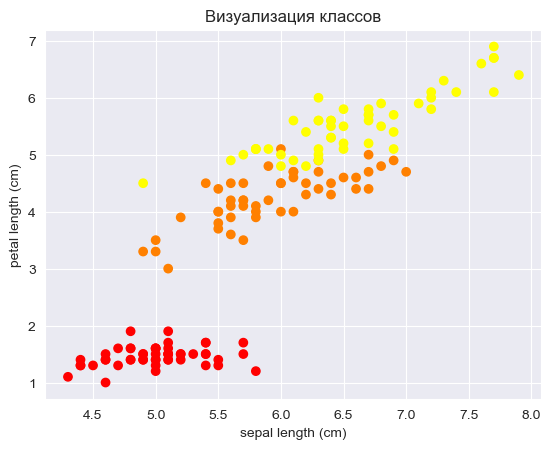

In [33]:


plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

Для применения метода ближайших соседей данные обязательно нужно нормализовать.

Ранее в других работах мы пользовались объектом StandartScaler, который приводит распределение каждого признака к стандартному виду.

Сейчас же для иллюстрации разных видов нормализации воспользуемся другим объектом - MinMaxScaler, который производит минимаксную нормализацию. Работа с этим объектом полностью аналогична

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Взаимное расположение точек не изменилось, но все значения по обеим осям масштабированы таким образом, чтобы занимать интервал от 0 до 1. Такие данные уже можно использовать для построения метода ближайших соседей.

Для построения модели создадим объект, обучим его на нашем наборе данных (обратите внимание, что мы используем нормализованный вариант данных) и сделаем предсказание

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

Для оценки качества работы полученной модели выведем матрицу классификации:

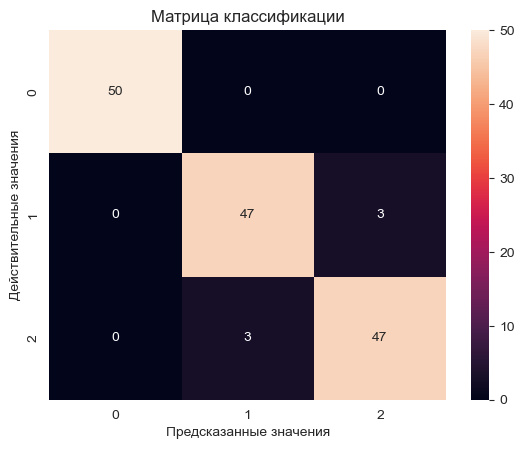

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [36]:
from sklearn.metrics import classification_report, confusion_matrix

plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print(classification_report(y_pred, y))

Мы видим, что в целом модель работает очень адекватно, из 150 точек неправильно распознает всего шесть. При этом, модель путает только второй и третий классы между собой. Первый класс модель всегда определяет безошибочно. Дополнительно мы можем вывести метрики качества множественной классификации в отчете о классификации
Здесь мы видим, что в целом наша модель имеет 96% точности, что свидетельствует о ее высоком качестве.

Теперь попробуем визуализировать области классификации, то есть построить границы принятия решений. Для этого, как и в предыдущих работах, будем использовать контурный график. Подготовим данные:

In [37]:
import numpy as np

X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

In [45]:
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

C:\Users\nshel\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


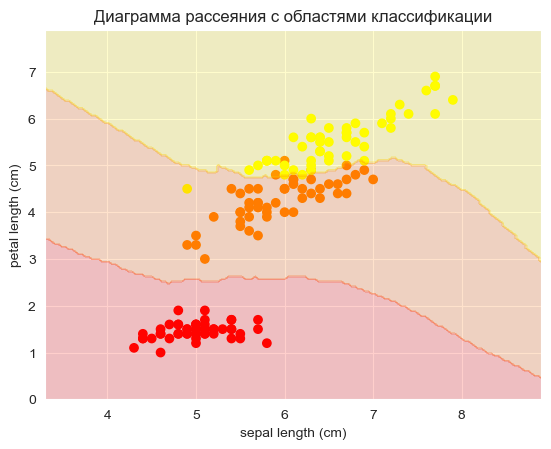

In [39]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [40]:
observation_new = [[5.5, 5]]

In [41]:
observation_new_scaled = scaler.transform(observation_new)

C:\Users\nshel\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [42]:
knn.predict(observation_new_scaled)

array([2])

In [43]:
distances, indices = knn.kneighbors(observation_new_scaled)

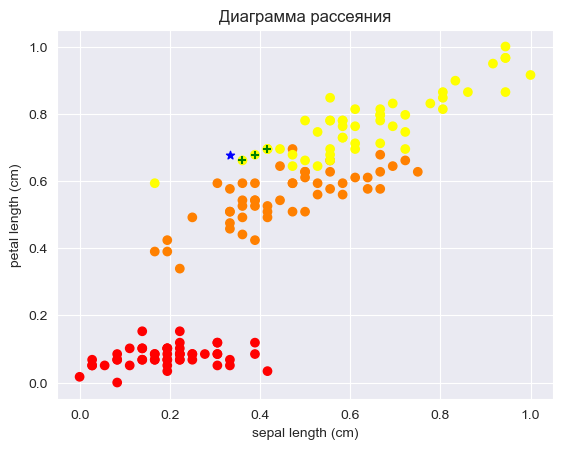

In [44]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

№1